In [15]:
import pandas as pd
from tqdm.auto import tqdm
import os 
import json
import numpy as np

In [16]:
# plot the data
import seaborn as sns
import scienceplots
import matplotlib.pyplot as plt

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": False,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 12,
    "font.size": 12,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 6,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.style.use(['science', 'nature'])
plt.rcParams.update(tex_fonts)

import matplotlib.font_manager

fm = matplotlib.font_manager.json_load("/home/chensun/.cache/matplotlib/fontlist-v330.json")

fm.findfont("serif", rebuild_if_missing=False)

'/home/data/chensun/affi_project/yes/envs/openwpm/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf'

# Calculate average accuracy scores

In [17]:
RESULT_DIR = "../../output/results/aff_ads_graph_level_fullGraph"

with open(os.path.join(RESULT_DIR, "accuracy")) as f:
    lines = f.readlines()
    print(lines)

    total_accuracy = 0
    total_precision = 0
    total_recall = 0
    count = 0
    for line in lines:
        accuracy = 0
        precision = 0
        recall = 0
        if "Accuracy" in line:
            accuracy = line.split(":")[1].strip()
        elif "Precision" in line and 'binary' in line:
            precision = line.split(":")[1].split(' ')[2].strip()
        elif "Recall" in line and 'binary' in line:
            recall = line.split(":")[1].split(' ')[2].strip()
        
        if accuracy != 0:
            total_accuracy += float(accuracy.replace('%', ''))
            count += 1
        if precision != 0:
            total_precision += float(precision.replace('%', ''))
        if recall != 0:
            total_recall += float(recall.replace('%', ''))
        

    print(f"Average accuracy: {total_accuracy/count}")
    print(f"Average precision: {total_precision/count}")
    print(f"Average recall: {total_recall/count}")

FileNotFoundError: [Errno 2] No such file or directory: '../../output/results/aff_ads_graph_level_fullGraph/accuracy'

In [ ]:
df_labeled = pd.read_csv('/home/data/chensun/affi_project/purl/output/results/01_24/phase1/with_model/labelled_results.csv')

/tmp/ipykernel_100071/1003097408.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count, bins_negative = np.histogram(df_labeled[df_labeled.nodes_div_by_edges < 1.25][df_labeled.label == 'affiliate'].nodes_div_by_edges, 24)
/tmp/ipykernel_100071/1003097408.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count, bins_positive = np.histogram(df_labeled[df_labeled.nodes_div_by_edges < 1.25][df_labeled.label == 'ads'].nodes_div_by_edges, 24)


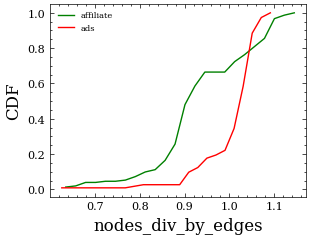

In [ ]:
# plt.figure(figsize=(8, 6))
count, bins_negative = np.histogram(df_labeled[df_labeled.nodes_div_by_edges < 1.25][df_labeled.label == 'affiliate'].nodes_div_by_edges, 24)
pdf_negative = count / sum(count)
cdf_negative = np.cumsum(pdf_negative)
plt.plot(bins_negative[1:], cdf_negative, label="affiliate", color='green')

count, bins_positive = np.histogram(df_labeled[df_labeled.nodes_div_by_edges < 1.25][df_labeled.label == 'ads'].nodes_div_by_edges, 24)
pdf_positive = count / sum(count)
cdf_positive = np.cumsum(pdf_positive)
plt.plot(bins_positive[1:], cdf_positive, label="ads", color='red')
plt.legend()
plt.xlabel("nodes_div_by_edges")
plt.ylabel("CDF")
plt.savefig("/home/data/chensun/affi_project/purl/output/results/aff_ads_mean_phaseA/nodes_div_by_edges.pdf", dpi=300, bbox_inches='tight')

In [ ]:
df_labeled[df_labeled.label == 'ads'].std_dev_closeness_centrality.describe()

count    114.000000
mean       0.005077
std        0.004451
min        0.000565
25%        0.002123
50%        0.003962
75%        0.006148
max        0.031236
Name: std_dev_closeness_centrality, dtype: float64

FileNotFoundError: [Errno 2] No such file or directory: '/home/data/chensun/affi_project/purl/output/results/aff_ads_mean_phaseA/std_dev_closeness_centrality.pdf'

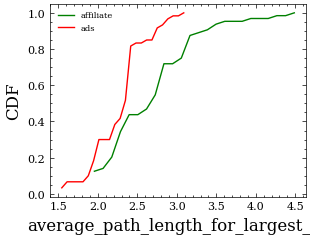

In [9]:
# plt.figure(figsize=(8, 6))
count, bins_negative = np.histogram(df_labeled[df_labeled.label == 'affiliate'].average_path_length_for_largest_cc, 24)
pdf_negative = count / sum(count)
cdf_negative = np.cumsum(pdf_negative)
plt.plot(bins_negative[1:], cdf_negative, label="affiliate", color='green')

count, bins_positive = np.histogram(df_labeled[df_labeled.label == 'ads'].average_path_length_for_largest_cc, 24)
pdf_positive = count / sum(count)
cdf_positive = np.cumsum(pdf_positive)
plt.plot(bins_positive[1:], cdf_positive, label="ads", color='red')
plt.legend()
plt.xlabel("average_path_length_for_largest_cc")
plt.ylabel("CDF")
plt.savefig("/home/data/chensun/affi_project/purl/output/results/01_24/std_dev_closeness_centrality.pdf", dpi=300, bbox_inches='tight')

In [13]:
df_labeled[df_labeled.label == 'affiliate'].average_path_length_for_largest_cc.describe()

count    64.000000
mean      2.645025
std       0.577770
min       1.846154
25%       2.202031
50%       2.648980
75%       3.020998
max       4.487691
Name: average_path_length_for_largest_cc, dtype: float64

FileNotFoundError: [Errno 2] No such file or directory: '/home/data/chensun/affi_project/purl/output/results/aff_ads_mean_phaseA/avg_clustering_coefficient.pdf'

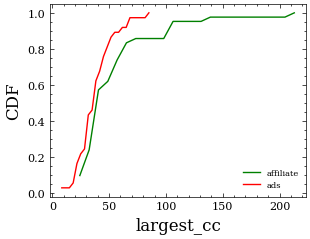

In [18]:
# plt.figure(figsize=(8, 6))
count, bins_negative = np.histogram(df_labeled[df_labeled.label == 'affiliate'].largest_cc, 24)
pdf_negative = count / sum(count)
cdf_negative = np.cumsum(pdf_negative)
plt.plot(bins_negative[1:], cdf_negative, label="affiliate", color='green')

count, bins_positive = np.histogram(df_labeled[df_labeled.label == 'ads'].largest_cc, 24)
pdf_positive = count / sum(count)
cdf_positive = np.cumsum(pdf_positive)
plt.plot(bins_positive[1:], cdf_positive, label="ads", color='red')
plt.legend()
plt.xlabel("largest_cc")
plt.ylabel("CDF")
plt.savefig("/home/data/chensun/affi_project/purl/output/results/aff_ads_mean_phaseA/avg_clustering_coefficient.pdf", dpi=300, bbox_inches='tight')

In [20]:
df_labeled[df_labeled.label == 'ads'].largest_cc.describe()

count    37.000000
mean     37.000000
std      15.677301
min       5.000000
25%      29.000000
50%      35.000000
75%      44.000000
max      85.000000
Name: largest_cc, dtype: float64

/tmp/ipykernel_100071/767929108.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count, bins_negative = np.histogram(df_labeled[df_labeled.counts_decoration < 60][df_labeled.label == 'affiliate'].counts_decoration, 24)
/tmp/ipykernel_100071/767929108.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count, bins_positive = np.histogram(df_labeled[df_labeled.counts_decoration < 60][df_labeled.label == 'ads'].counts_decoration, 24)


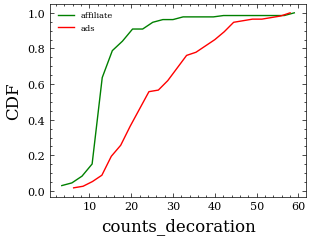

In [39]:
# plt.figure(figsize=(8, 6))
count, bins_negative = np.histogram(df_labeled[df_labeled.counts_decoration < 60][df_labeled.label == 'affiliate'].counts_decoration, 24)
pdf_negative = count / sum(count)
cdf_negative = np.cumsum(pdf_negative)
plt.plot(bins_negative[1:], cdf_negative, label="affiliate", color='green')

count, bins_positive = np.histogram(df_labeled[df_labeled.counts_decoration < 60][df_labeled.label == 'ads'].counts_decoration, 24)
pdf_positive = count / sum(count)
cdf_positive = np.cumsum(pdf_positive)
plt.plot(bins_positive[1:], cdf_positive, label="ads", color='red')
plt.legend()
plt.xlabel("counts_decoration")
plt.ylabel("CDF")
plt.savefig("/home/data/chensun/affi_project/purl/output/results/aff_ads_mean_phaseA/counts_decoration.pdf", dpi=300, bbox_inches='tight')

In [42]:
df_labeled[df_labeled.label == 'ads'].ascendant_has_ad_keyword.describe()

count    114.000000
mean       0.898288
std        0.149537
min        0.230769
25%        0.810847
50%        1.000000
75%        1.000000
max        1.000000
Name: ascendant_has_ad_keyword, dtype: float64

/tmp/ipykernel_100071/1007004516.py:3: RuntimeWarning: divide by zero encountered in divide
  pdf_negative = count / sum(count)
/tmp/ipykernel_100071/1007004516.py:3: RuntimeWarning: invalid value encountered in divide
  pdf_negative = count / sum(count)


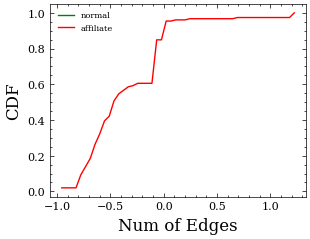

In [43]:
# plt.figure(figsize=(8, 6))
count, bins_negative = np.histogram(df_labeled[df_labeled.label == 'normal'].max_depth_decoration, 50)
pdf_negative = count / sum(count)
cdf_negative = np.cumsum(pdf_negative)
plt.plot(bins_negative[1:], cdf_negative, label="normal", color='green')

count, bins_positive = np.histogram(df_labeled[df_labeled.label == 'affiliate'].max_depth_decoration, 50)
pdf_positive = count / sum(count)
cdf_positive = np.cumsum(pdf_positive)
plt.plot(bins_positive[1:], cdf_positive, label="affiliate", color='red')
plt.legend()
plt.xlabel("Num of Edges")
plt.ylabel("CDF")
plt.savefig("/home/data/chensun/affi_project/purl/output/results/aff_normal_mean_phaseA/max_depth_decoration.pdf", dpi=300, bbox_inches='tight')

In [44]:
count, bins_negative = np.histogram(df_labeled[df_labeled.label == 'Negative'].shannon_entropy, 50)
pdf_negative = count / sum(count)
cdf_negative = np.cumsum(pdf_negative)

/tmp/ipykernel_100071/346222907.py:2: RuntimeWarning: divide by zero encountered in divide
  pdf_negative = count / sum(count)
/tmp/ipykernel_100071/346222907.py:2: RuntimeWarning: invalid value encountered in divide
  pdf_negative = count / sum(count)


In [45]:
cdf_negative[24]

nan

In [46]:
cdf_positive[24]

0.9605263157894738

In [47]:
bins_negative[24]

0.48

/tmp/ipykernel_100071/4016665578.py:3: RuntimeWarning: divide by zero encountered in divide
  pdf = count / sum(count)
/tmp/ipykernel_100071/4016665578.py:3: RuntimeWarning: invalid value encountered in divide
  pdf = count / sum(count)


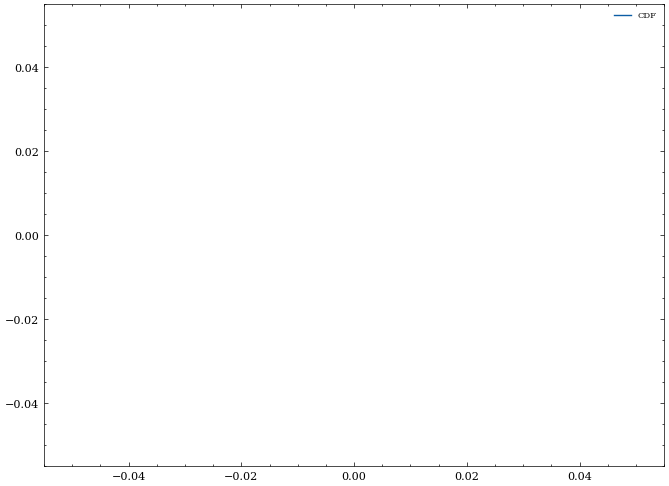

In [48]:
plt.figure(figsize=(8, 6))
count, bins = np.histogram(df_labeled[df_labeled.label == 'Negative'].shannon_entropy, 50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins[1:], cdf, label="CDF")
plt.legend()
plt.show()

In [49]:
df_labeled[df_labeled.label == 'Positive'].shannon_entropy.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: shannon_entropy, dtype: float64

In [50]:
df_labeled[df_labeled.label == 'Negative'].shannon_entropy.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: shannon_entropy, dtype: float64

In [58]:
df_labeled[df_labeled.label == 'ads'].num_nodes.describe()

count    114.000000
mean      45.729378
std      105.154970
min        5.000000
25%       14.703571
50%       18.102679
75%       27.176692
max      778.744186
Name: num_nodes, dtype: float64

/tmp/ipykernel_100071/2252857499.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count, bins_negative = np.histogram(df_labeled[df_labeled.num_nodes < 100][df_labeled.label == 'affiliate'].num_nodes, 50)
/tmp/ipykernel_100071/2252857499.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count, bins_positive = np.histogram(df_labeled[df_labeled.num_nodes < 100][df_labeled.label == 'ads'].num_nodes, 50)


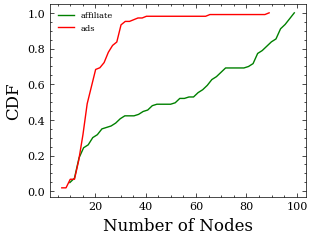

In [59]:
# plt.figure(figsize=(8, 6))
count, bins_negative = np.histogram(df_labeled[df_labeled.num_nodes < 100][df_labeled.label == 'affiliate'].num_nodes, 50)
pdf_negative = count / sum(count)
cdf_negative = np.cumsum(pdf_negative)
plt.plot(bins_negative[1:], cdf_negative, label="affiliate", color='green')

count, bins_positive = np.histogram(df_labeled[df_labeled.num_nodes < 100][df_labeled.label == 'ads'].num_nodes, 50)
pdf_positive = count / sum(count)
cdf_positive = np.cumsum(pdf_positive)
plt.plot(bins_positive[1:], cdf_positive, label="ads", color='red')
plt.legend()
plt.xlabel("Number of Nodes")
plt.ylabel("CDF")
plt.savefig("/home/data/chensun/affi_project/purl/output/results/aff_normal_mean_phaseA/number_of_nodes_cdf.pdf", dpi=300, bbox_inches='tight')

In [54]:
cdf_negative[6]

nan

In [55]:
cdf_positive[6]

0.3170731707317073

In [56]:
bins_negative[6]

0.12